In [45]:
# This is a textual analysis project examining Craigslist data from San Francisco 
# housing boards.

In [46]:
# Import packages and libraries.

In [47]:
import numpy as np
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline  

In [48]:
# Read in Craigslist data.

In [49]:
data = pd.read_csv('data/craigslist.csv')

In [50]:
# List the columns in the file.

In [51]:
list(data)

['time', 'price', 'size', 'brs', 'title', 'link', 'location']

In [52]:
# Preview the first ten lines of the 'title' column.
# Note: the 'title column' contains the ad description
# and each row represents an ad.

In [53]:
data['title'].head(10)

0    Furnished Townhouse in the Elmwood  Available ...
1          Private/small studio ALL UTILITIES INCLUDED
2    Luxury  Convenience all at Parker Movein speci...
3    New luxury 2BR in Downtown Berkeley  1500 off ...
4       One Bedroom Ready For You 500 off Move In Cost
5                       Ready Now for Immediate Movein
6    Super Sharp 1 bed/1 bath Rooftop Lounge Panoramic
7    Large 1 bedroom with Den  in beautiful LEEDCer...
8                                     Elmwood District
9                        Near downtown Berkeley Studio
Name: title, dtype: object

In [54]:
# Describe the data.

In [55]:
data.describe()

,price,size,brs
count,5876.000000,4384.000000,5876.000000
mean,3125.225153,1053.400547,1.847345
std,1246.079414,1020.798308,0.826381
min,600.000000,1.000000,1.000000
25%,2345.000000,735.000000,1.000000
50%,2865.000000,947.000000,2.000000
75%,3595.000000,1200.000000,2.000000
max,20000.000000,62000.000000,4.000000


In [56]:
# Determine data shape.

In [57]:
data.shape

(5876, 7)

In [58]:
# Remove floats from title variable and convert to lowercase.

In [59]:
titles = data['title'].astype(str)
titles=(" ").join(titles)
titles = titles.lower()

In [60]:
# Split titles into given words to be used in textual analysis.

In [61]:
tokens = [t for t in titles.split()]
print(tokens)

['furnished', 'townhouse', 'in', 'the', 'elmwood', 'available', 'march', '8', '2017', 'private/small', 'studio', 'all', 'utilities', 'included', 'luxury', 'convenience', 'all', 'at', 'parker', 'movein', 'special', 'hurry', 'in', 'new', 'luxury', '2br', 'in', 'downtown', 'berkeley', '1500', 'off', '1st', 'months', 'rent', 'one', 'bedroom', 'ready', 'for', 'you', '500', 'off', 'move', 'in', 'cost', 'ready', 'now', 'for', 'immediate', 'movein', 'super', 'sharp', '1', 'bed/1', 'bath', 'rooftop', 'lounge', 'panoramic', 'large', '1', 'bedroom', 'with', 'den', 'in', 'beautiful', 'leedcertified', 'green', 'bldg', 'elmwood', 'district', 'near', 'downtown', 'berkeley', 'studio', 'advent', 'recently', 'remodeled', 'upper', 'floor', 'apartment', 'with', 'onsite', 'laundry', 'gorgeous', 'new', 'home', 'with', 'two', 'fireplaces', 'price', 'negotiable', 'really', 'comfortable', 'cute', 'furnished', 'apartment.', 'gustavo', 'lopez', 'amsi', 'one', 'bedroom', 'one', 'bath', 'steps', 'from', 'bart', 'g

In [62]:
# First, remove stop words from the array. 

In [63]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)

In [64]:
# Create count frequency to determine the number of times a word appears.

In [65]:
freq = nltk.FreqDist(clean_tokens)
for key, val in freq.items(): 
    print(str(key) + ":" + str(val))

furnished:149
townhouse:130
elmwood:6
available:328
march:1
8:17
2017:3
private/small:1
studio:67
utilities:44
included:49
luxury:141
convenience:15
parker:15
movein:78
special:178
hurry:20
new:379
2br:77
downtown:255
berkeley:108
1500:24
1st:80
months:40
rent:429
one:399
bedroom:1012
ready:116
500:74
move:214
cost:3
immediate:30
super:19
sharp:4
1:957
bed/1:18
bath:630
rooftop:6
lounge:6
panoramic:10
large:279
den:42
beautiful:409
leedcertified:4
green:8
bldg:14
district:43
near:284
advent:8
recently:11
remodeled:370
upper:24
floor:306
apartment:485
onsite:5
laundry:52
gorgeous:113
home:650
two:171
fireplaces:4
price:63
negotiable:4
really:1
comfortable:15
cute:16
apartment.:7
gustavo:1
lopez:1
amsi:1
steps:23
bart:118
great:408
schools:74
safe:18
area:74
1bed:22
nice:79
close:200
uc:27
station:24
greatest:2
sublet:2
campus:25
market:3
somewhat:1
likely:1
2:1098
west:59
1250:2
2nd:33
fl:5
2/1:23
bright:98
quiet:106
noparking:1
space:35
block:23
ucb:17
spacious:413
fine:1
arts....comin

marvelous:1
tier:1
hear:2
dream:4
serenity:7
view...move:6
twostory:2
urbanescape:1
nose:3
dive:3
decreased:1
150:5
bayoct:1
almost:3
6363:2
christie:2
1213:2
11/11:2
nfl:2
200:5
doesnt:1
pain:1
view...spoooktacular:1
security:3
99deposit:1
superb:3
weeks:144
avenue64:1
adorable:3
oakld:1
12noon:1
grills:2
mini/vertical:1
blinds:6
patios/balconies:2
atm:6
2865:1
bridge.:1
discounted:7
rents:2
highway:2
tub:6
spooky:1
2bd/2bath:2
2500:8
bdrm/1bath:2
picnic:2
areas:10
401:1
suite:4
wake:2
happy:3
choose:3
artistry:1
dramatic:2
track:3
business:5
saving:2
pristine:6
floorpan:1
2bd/2ba.:1
rivetingly:1
going:7
renovated.:1
sensational:1
retail:1
package:5
receiving:2
kitchens:3
icon:1
splendor:1
save:15
ny:1
emeryville.open:1
plan.:1
3900:1
adeline:1
zen:1
day:4
fire:2
pit:1
highspeed:1
swimming:11
pools:4
assigned:4
spots:1
partial:1
1br/1bath:2
oaklandberkeley:1
27th:1
landlord:1
wavieapp:1
appeal:1
livingroom:3
microwaves:10
nearby:5
recreation:1
resident:2
riveting:1
1bd/1ba.:1
octobers

In [66]:
# Create a frequency plot to visualize the 10 most frequently appearing words.

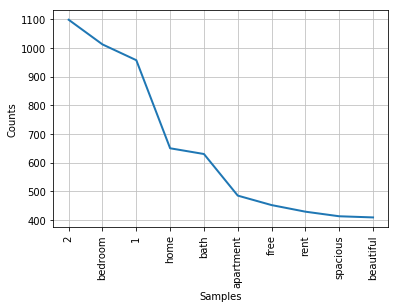

In [67]:
freq.plot(10, cumulative = False)

In [68]:
# Create a wordcloud for additional visualization. 

In [69]:
# Import library for visualization.

In [70]:
import matplotlib.pyplot as plt

In [71]:
# Create and generate a word cloud image: 

In [72]:
wordcloud = WordCloud().generate(titles)

In [73]:
# Create and display the generated image.

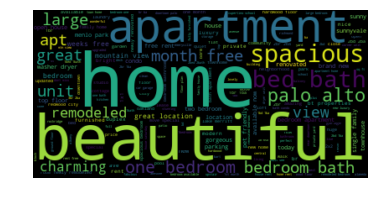

In [74]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()